In [2]:
import numpy as np
import pandas as pd

# Distribution of unaccompanied children into US, by originating country
tables = pd.read_html("https://www.acf.hhs.gov/orr/about/ucs/facts-and-data#countryoforigin")

# Extract table 1, which has the data indicated in the previous comment
df = tables[1]
# Reverse the column order so that the data is displayed with column headings FY2012 to FY2017, in that order.
cols = ['Country of Origin',
 'FY2012',
 'FY2013',
 'FY2014',
 'FY2015',
 'FY2016',
 'FY2017']
df = df[cols]
df.columns = ['Origin', '2012','2013','2014','2015','2016', '2017']
df.set_index('Origin', inplace=True)
df = df.loc[['El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'All other countries'], ['2012','2013','2014','2015','2016']]
df
# Observe that 4 countries account of almost 95% of the unaccompanied children into the US.

,2012,2013,2014,2015,2016
Origin,,,,,
El Salvador,27%,26%,29%,29%,34%
Guatemala,34%,37%,32%,45%,40%
Honduras,27%,30%,34%,17%,21%
Mexico,8%,3%,<2%,6%,3%
All other countries,4%,5%,<3%,3%,2%


In [3]:
a=['2012','2013','2014','2015','2016']
for i in a:
    df[i] = df[i].map(lambda x: x.lstrip('<').rstrip('%'))
df

,2012,2013,2014,2015,2016
Origin,,,,,
El Salvador,27,26,29,29,34
Guatemala,34,37,32,45,40
Honduras,27,30,34,17,21
Mexico,8,3,2,6,3
All other countries,4,5,3,3,2


In [4]:
df[a]= df[a].apply(pd.to_numeric)
df


,2012,2013,2014,2015,2016
Origin,,,,,
El Salvador,27,26,29,29,34
Guatemala,34,37,32,45,40
Honduras,27,30,34,17,21
Mexico,8,3,2,6,3
All other countries,4,5,3,3,2


In [5]:
dg = pd.read_excel("https://dataunodc.un.org/sites/dataunodc.un.org/files/homicide_report_total_and_sex.xlsx", skiprows=[0,1,2,3,4])
dg =dg.loc[:, ('UNODC Name','2012.1','2013.1','2014.1','2015.1','2016.1')]
dg.columns = ['Origin', '2012','2013','2014','2015','2016']
dg.set_index('Origin', inplace=True)
dg = dg.loc[['El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Colombia'], ['2012','2013','2014','2015','2016']]
dg

,2012,2013,2014,2015,2016
Origin,,,,,
El Salvador,41.695827,40.203002,62.424487,105.441952,82.842257
Guatemala,33.756670,33.681251,31.387456,29.398682,27.255019
Honduras,84.320462,74.279969,66.873147,57.450042,56.515703
Mexico,21.490825,18.821412,16.108310,16.492051,19.263960
Colombia,35.067156,32.568714,27.918951,26.502893,25.504326


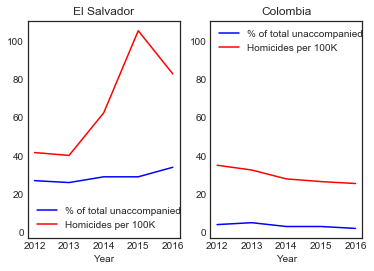

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.style.use('seaborn-white')

x=a
plt.figure()
ax1 = plt.subplot (1,2,1)
ax2 = plt.subplot (1,2,2, sharey = ax1)

y1 = df.iloc[0]
y2 = dg.iloc[0] 
ax1.set_title("El Salvador")
ax1.plot(x, y1, '-b', label='% of total unaccompanied')
ax1.plot(x, y2, '-r', label='Homicides per 100K')
ax1.legend(loc='lower left')
ax1.set_xlabel('Year')

y3 = df.iloc[4]
y4 = dg.iloc[4]
ax2.set_title("Colombia")
ax2.plot(x, y3, '-b', label='% of total unaccompanied')
ax2.plot(x, y4, '-r', label='Homicides per 100K')
ax2.legend(loc='upper left')
ax2.set_xlabel('Year')
plt.show()